# Machine Learning Final Project: Question 2
## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

# Library

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis and Wrangling

## `Read data`

In [50]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

## `Get sample`

In [51]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
17806,41,management,married,tertiary,no,328,yes,no,cellular,29,jul,65,12,-1,0,unknown,no
18955,54,management,married,tertiary,no,11391,no,no,cellular,4,aug,333,1,-1,0,unknown,no
1196,37,technician,married,secondary,no,316,yes,no,unknown,8,may,238,1,-1,0,unknown,no
38522,31,management,single,tertiary,no,2734,yes,no,cellular,15,may,858,3,-1,0,unknown,yes
23261,31,technician,divorced,secondary,no,-175,no,no,telephone,27,aug,9,15,-1,0,unknown,no
11548,42,management,married,unknown,no,587,yes,no,unknown,19,jun,16,9,-1,0,unknown,no
43484,24,management,single,tertiary,no,736,yes,no,cellular,15,apr,442,2,246,2,other,yes
16484,40,blue-collar,single,secondary,yes,61,no,no,cellular,23,jul,68,2,-1,0,unknown,no
43286,40,management,single,tertiary,no,1509,no,no,cellular,15,mar,144,2,124,1,failure,no
39158,27,technician,married,secondary,no,267,yes,no,cellular,18,may,166,4,-1,0,unknown,no


In [52]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2081,48,unknown,married,unknown,no,286,no,no,cellular,30,jul,166,2,-1,0,unknown,no
1130,29,management,married,tertiary,no,877,no,no,cellular,3,feb,166,3,-1,0,unknown,no
1044,44,unemployed,married,tertiary,no,178,no,no,cellular,8,aug,126,2,-1,0,unknown,no
4107,50,blue-collar,married,primary,no,2142,yes,no,cellular,29,jan,309,2,224,1,other,no
1936,37,management,single,tertiary,no,695,no,no,cellular,28,jan,233,1,-1,0,unknown,no
2134,58,retired,married,secondary,no,425,yes,yes,cellular,17,nov,100,1,-1,0,unknown,no
2021,41,technician,married,tertiary,no,0,no,no,unknown,20,jun,95,1,-1,0,unknown,no
327,35,entrepreneur,single,tertiary,no,145,yes,no,cellular,18,jul,799,2,-1,0,unknown,yes
3571,26,admin.,married,secondary,no,2469,no,no,cellular,16,jul,136,8,-1,0,unknown,no
3389,46,management,divorced,secondary,no,361,yes,no,unknown,19,may,86,7,-1,0,unknown,no


## `Get data informaion`

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Statistical analysis on data

## `1. Overview statistics`

In [54]:
train_df.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


## `2. Correlation Matrix`

Text(0.5, 1.0, 'Data correlations')

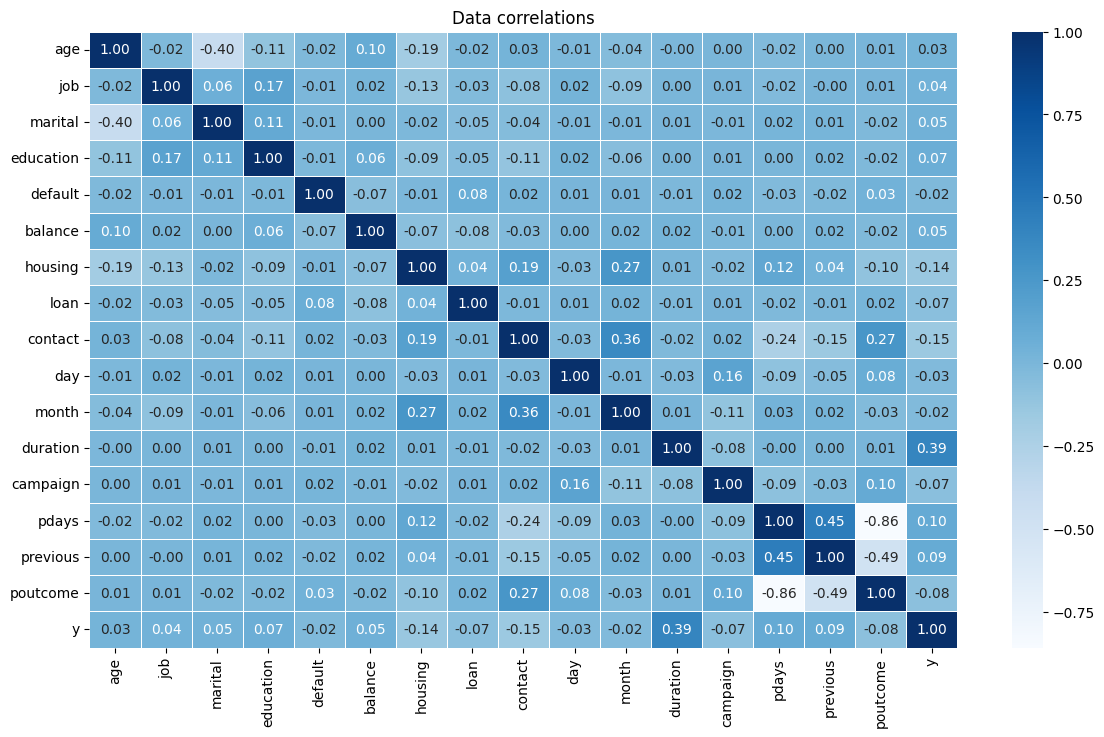

In [55]:
encoded_train = train_df.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

## `3. Chart Box`

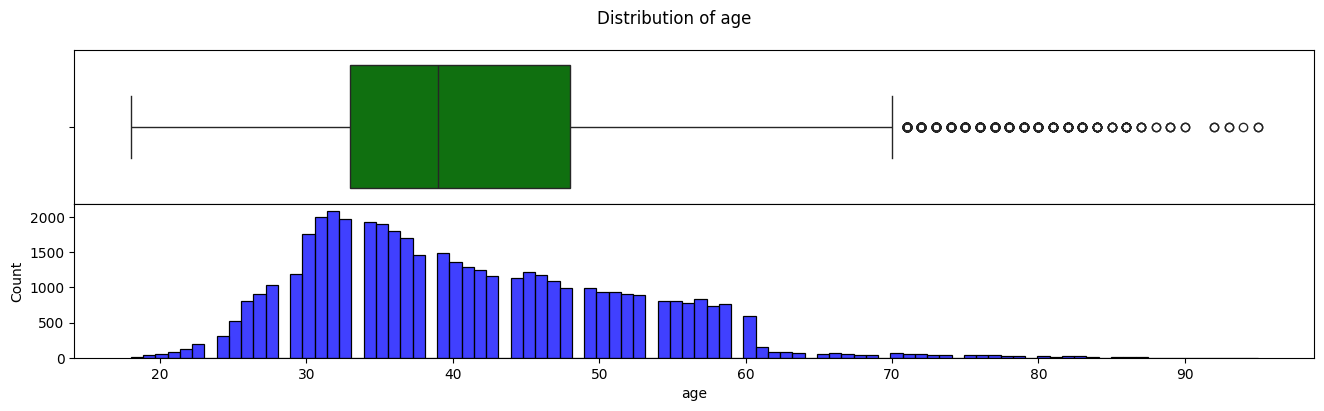

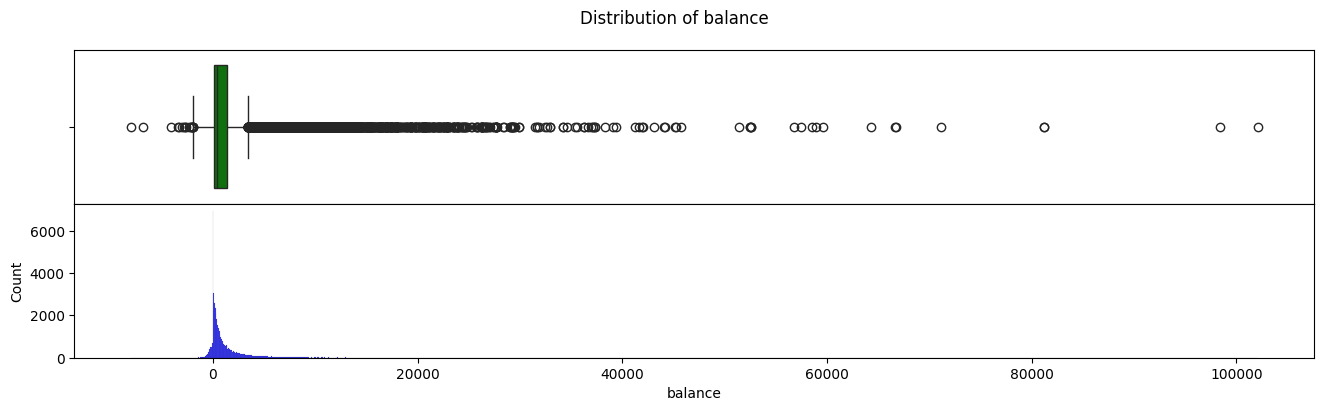

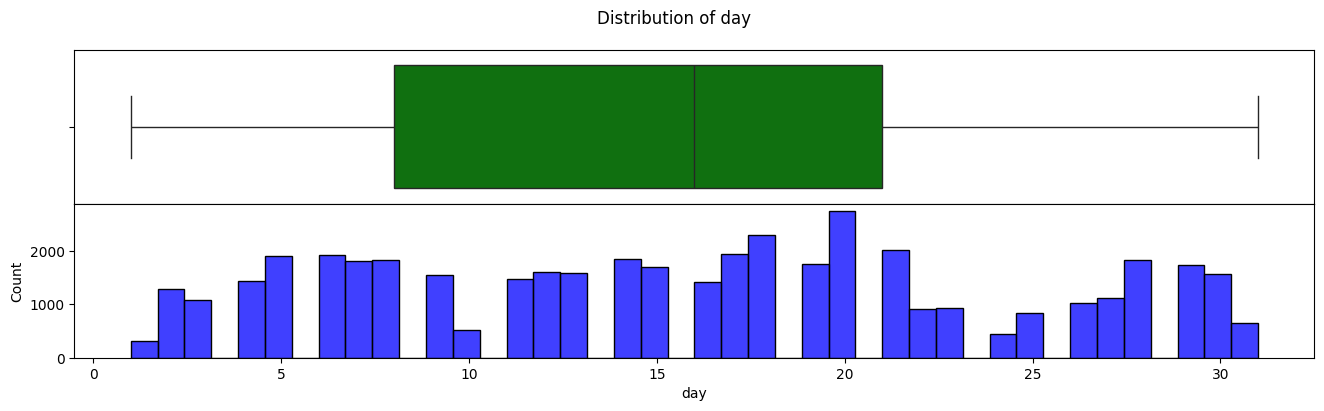

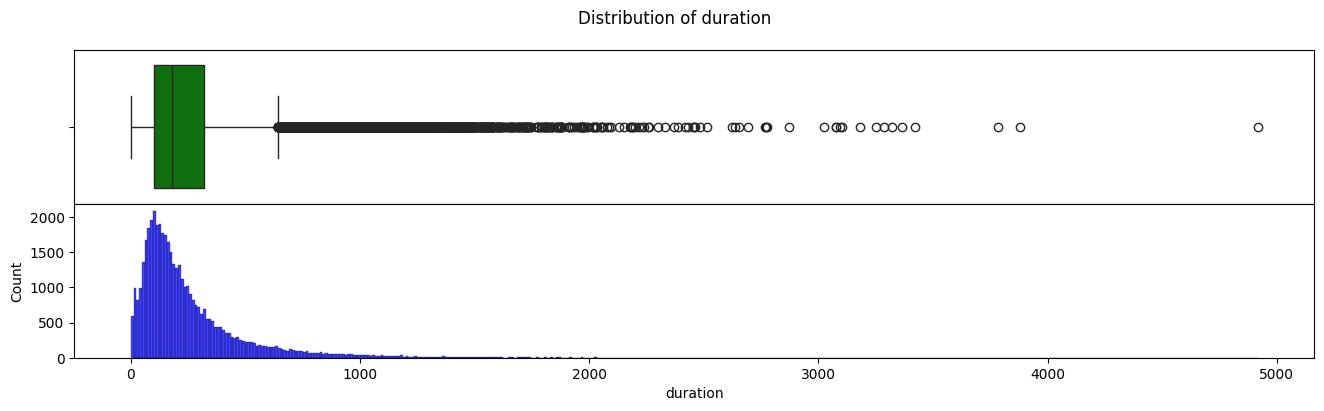

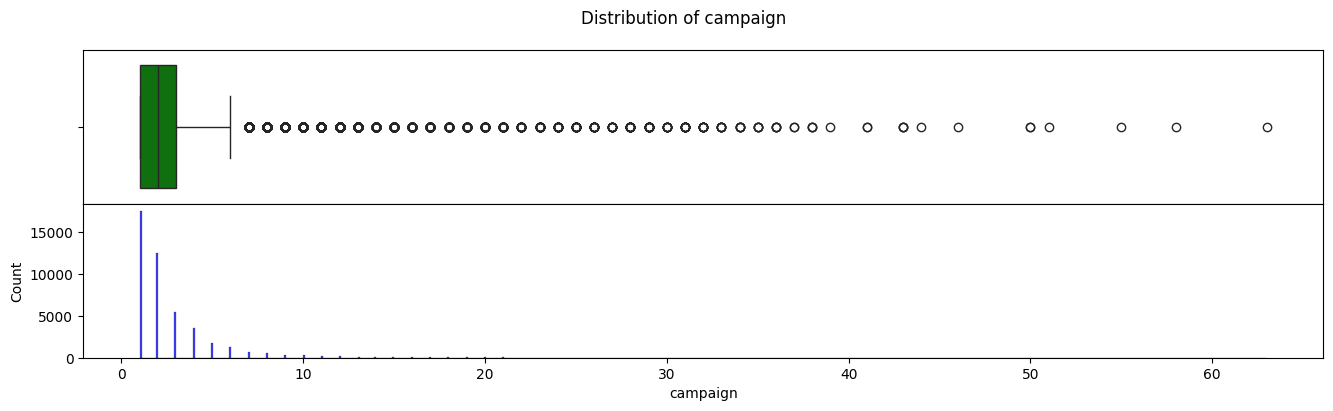

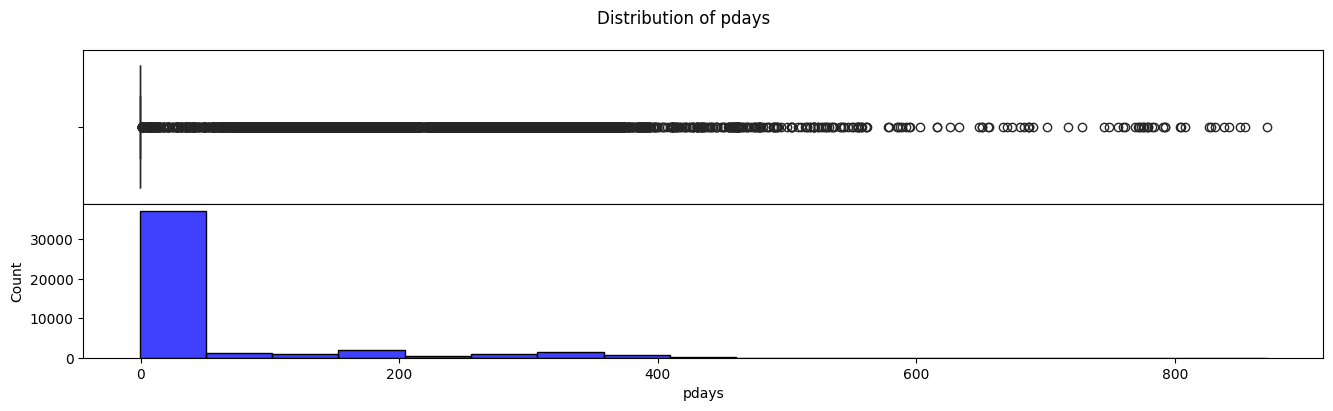

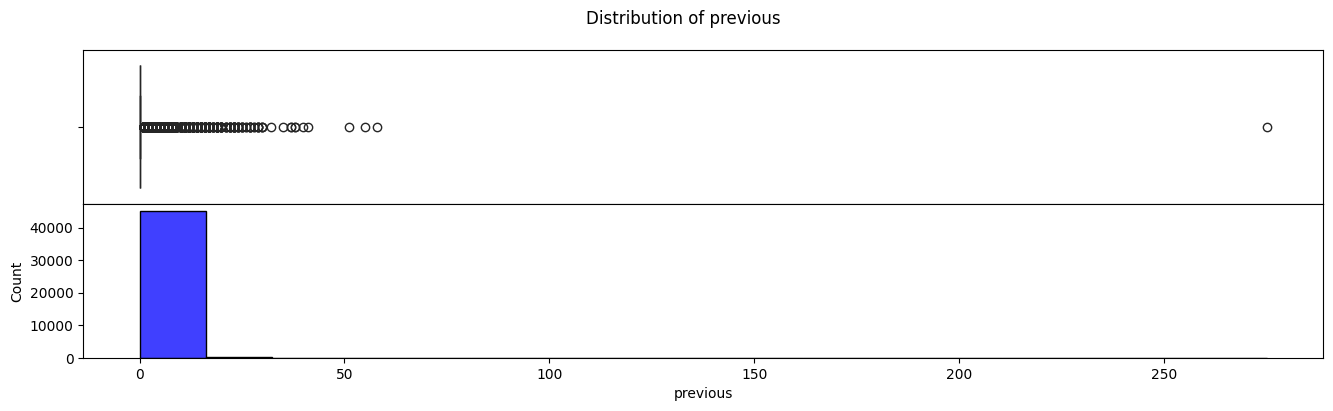

In [56]:
numerical = train_df.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train_df, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train_df, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

## `4. Target class imbalance`

Count of each Status:
y
no     39922
yes     5289
Name: count, dtype: int64



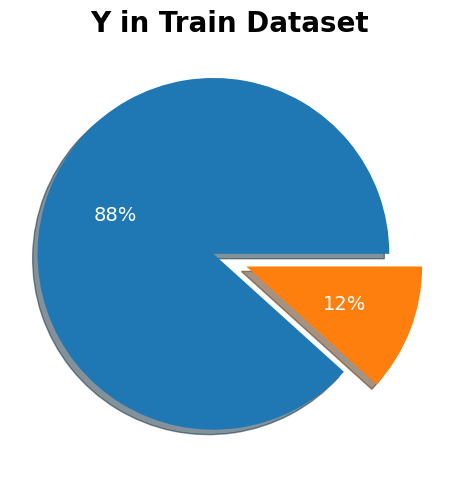

In [57]:
status_counts = train_df['y'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    train_df['y'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(train_df['y'].nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)

ax.set_title('Y in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

# Data preprocessing

## `Data encoding`

In [58]:
le = LabelEncoder()
train_df = train_df.apply(le.fit_transform)
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [59]:
test_df = test_df.apply(le.fit_transform)
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


## `Data Scaling`

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale=scaler.fit_transform(train_df)
scale=scaler.fit_transform(test_df)

## `Data Splitting`

In [61]:
X_train=train_df.drop(['job','marital','day','month','y'], axis = 1)
y_train=train_df['y']


X_test=test_df.drop(['job','marital','day','month','y'],axis=1)
y_test=test_df['y']

In [62]:
X_train

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,40,2,0,3036,1,0,2,261,0,0,0,3
1,26,1,0,945,1,0,2,151,0,0,0,3
2,15,1,0,918,1,1,2,76,0,0,0,3
3,29,3,0,2420,1,0,2,92,0,0,0,3
4,15,3,0,917,0,0,2,198,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,2,0,1741,0,0,0,975,2,0,0,3
45207,53,0,0,2639,0,0,0,456,1,0,0,3
45208,54,1,0,5455,0,0,0,1116,4,181,3,2
45209,39,1,0,1584,0,0,1,508,3,0,0,3


In [63]:
X_test

,age,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,11,0,0,1475,0,0,0,75,0,0,0,3
1,14,1,0,2030,1,1,0,216,0,228,4,0
2,16,2,0,1303,1,0,0,181,0,219,1,0
3,11,2,0,1352,1,1,2,195,3,0,0,3
4,40,1,0,274,1,0,2,222,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,1,0,119,1,0,0,325,4,0,0,3
4517,38,2,1,0,1,1,2,149,0,0,0,3
4518,38,1,0,558,0,0,0,147,10,0,0,3
4519,9,1,0,1187,0,0,0,125,3,140,3,1


# Basic Model

In [64]:
def make_confusion_matrix(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

## `Logistic Regression`

In [65]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

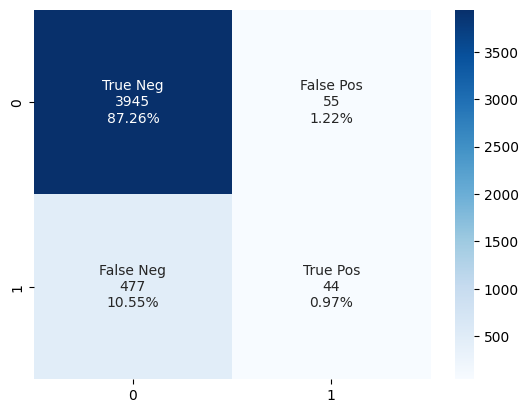

In [66]:
y_pred = LR.predict(X_test)
make_confusion_matrix (confusion_matrix(y_test, y_pred))

## `KNN`

In [67]:
my_params={'n_neighbors':[7,9,11], 'p':[3,5,7]}

knn=KNeighborsClassifier()
grid=GridSearchCV(knn,my_params,cv=5).fit(X_train,y_train)

sorted(grid.cv_results_.keys())
grid_search_results=pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

In [68]:
grid_search_results

,mean_test_score,std_test_score,params,rank_test_score,mean_fit_time
0,0.874521,0.019333,"{'n_neighbors': 7, 'p': 3}",8,0.073357
1,0.874742,0.019082,"{'n_neighbors': 7, 'p': 5}",7,0.067425
2,0.874212,0.019150,"{'n_neighbors': 7, 'p': 7}",9,0.062678
3,0.875937,0.018379,"{'n_neighbors': 9, 'p': 3}",6,0.064398
4,0.876003,0.018301,"{'n_neighbors': 9, 'p': 5}",5,0.065949
5,0.876667,0.017683,"{'n_neighbors': 9, 'p': 7}",4,0.067311
6,0.877397,0.017350,"{'n_neighbors': 11, 'p': 3}",1,0.068651
7,0.877131,0.017154,"{'n_neighbors': 11, 'p': 5}",2,0.062732
8,0.876910,0.017081,"{'n_neighbors': 11, 'p': 7}",3,0.069153


In [69]:
grid.best_params_

{'n_neighbors': 11, 'p': 3}

In [70]:
model=KNeighborsClassifier(n_neighbors = 11, p=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Confusion Matrix:


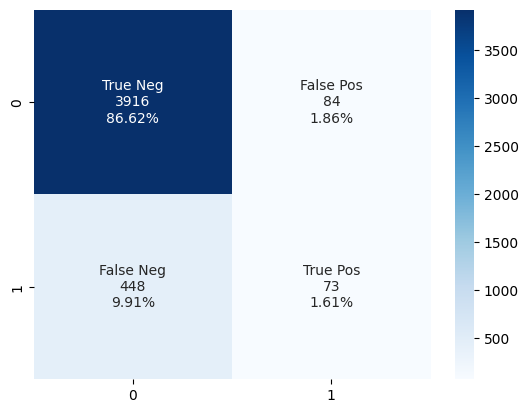

In [72]:
print('Confusion Matrix:')
make_confusion_matrix (confusion_matrix(y_test, y_pred))

In [73]:
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.46      0.14      0.22       521

    accuracy                           0.88      4521
   macro avg       0.68      0.56      0.58      4521
weighted avg       0.85      0.88      0.85      4521



## `Decision Trree`

In [74]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

## `Naive Bayes`

In [75]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

## `SVM`

In [76]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

## `Perceptron`

In [77]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

# Ensemble Learing

## `Bagging`

In [78]:
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42)

In [79]:
y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8847600088476001


## `Voting`

In [80]:
voting = VotingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier()), ('logreg', LogisticRegression())], voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('logreg', LogisticRegression())])

In [81]:
y_pred = voting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8942711789427118


## `Stacking`

In [82]:
stacking = StackingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('ada', AdaBoostClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [83]:
y_pred = stacking.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8856447688564477


## `Random Forest`

In [84]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 218, 236, 254, 272, 290, 309, 327, 345, 363, 381, 400, 418, 436, 454, 472, 490, 509, 527, 545, 563, 581, 600, 618, 636, 654, 672, 690, 709, 727, 745, 763, 781, 800, 818, 836, 854, 872, 890, 909, 927, 945, 963, 981, 1000, 1018, 1036, 1054, 1072, 1090, 1109, 1127, 1145, 1163, 1181, 1200, 1218, 1236, 1254, 1272, 1290, 1309, 1327, 1345, 1363, 1381, 1400, 1418, 1436, 1454, 1472, 1490, 1509, 1527, 1545, 1563, 1581, 1600, 1618, 1636, 1654, 1672, 1690, 1709, 1727, 1745, 1763, 1781, 1800, 1818, 1836, 1854, 1872, 1890, 1909, 1927, 1945, 1963, 1981, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [86]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
randomforestmodel=RandomForestClassifier(n_estimators= 618,
    min_samples_split = 5,
    min_samples_leaf = 4,
    max_features = 'sqrt',
    max_depth= 90,
    bootstrap= True)

randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=618)

In [ ]:
y_pred_rf=randomforestmodel.predict(X_test)
classification_rep = classification_report(y_test, y_pred_rf)

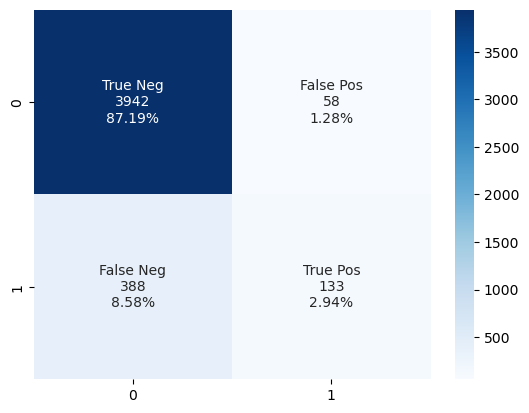

In [ ]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf))

In [ ]:
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.70      0.26      0.37       521

    accuracy                           0.90      4521
   macro avg       0.80      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521



## `Gradient Boosting`

In [ ]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = GB.predict(X_test)
print('Accuracy:', accuracy)

Accuracy: 0.9312099093120991


## `Adaboost`

In [ ]:
ADA = AdaBoostClassifier(n_estimators=50)
ADA.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = ADA.predict(X_test)
print('Accuracy:', accuracy)

Accuracy: 0.9312099093120991


## `XGBoost`

In [ ]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
xgb_y_pred = best_estimator.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

print("Model Accuracy:", xgb_accuracy)
print("Classification Report:\n", xgb_report)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Model Accuracy: 0.8847600088476001
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



## `LightGBM`

In [ ]:
LGB = lgb.LGBMClassifier(random_state=42)
LGB.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5289, number of negative: 39922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116985 -> initscore=-2.021298
[LightGBM] [Info] Start training from score -2.021298


LGBMClassifier(random_state=42)

In [ ]:
y_pred = LGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.907100199071002


# Feed Forward Neural Network

In [87]:
model_ffnn = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [88]:
model_ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=16)


Epoch 1/10


2826/2826 [==============================] - 6s 1ms/step - loss: 1.9547 - accuracy: 0.8379
Epoch 2/10
2826/2826 [==============================] - 3s 1ms/step - loss: 0.6339 - accuracy: 0.8564
Epoch 3/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.5646 - accuracy: 0.8604
Epoch 4/10
2826/2826 [==============================] - 3s 1ms/step - loss: 0.4297 - accuracy: 0.8733
Epoch 5/10
2826/2826 [==============================] - 3s 1ms/step - loss: 0.3539 - accuracy: 0.8761
Epoch 6/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.3283 - accuracy: 0.8796
Epoch 7/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.3031 - accuracy: 0.8839
Epoch 8/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2838 - accuracy: 0.8875
Epoch 9/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.2800 - accuracy: 0.8884
Epoch 10/10
2826/2826 [==============================] - 4s 1ms/step - loss: 0.

In [89]:
loss, accuracy = model_ffnn.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

142/142 [==============================] - 0s 1ms/step - loss: 0.2715 - accuracy: 0.8890
Test Loss: 0.2715337872505188
Test Accuracy: 0.8889626264572144


# Reccurent Neural Network